# Ida Flood Extent

## Getting Started

### Get data from GEE

In GEE run code to get Sentinel-2 imagery for September 2, 2021

### Get data into python

If having trouble importing, check Anaconda, if not in there then open Anaconda Prompt (go to where the app is), then type --> conda install -c conda-forge PACKAGENAME

In [1]:
# Import packages
import os
import rasterio as rio
from rasterio.plot import show
import rioxarray as rxr
import geopandas as gpd
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [2]:
# Set wd
wd_path = "C:\\Users\\rcompos\\OneDrive - North Carolina State University\\Documents\\Research\\Scripts"
os.chdir(wd_path)
os.getcwd() # get wd
#os.listdir() # get available data

'C:\\Users\\rcompos\\OneDrive - North Carolina State University\\Documents\\Research\\Scripts'

## Prepare Sentinel-2

### Read in Sentinel-2 Data

In [3]:
# Paths
s2_path = "./Sentinel_data/Sentinel2_09012021.tif" # Sentinel2_09012021.tif
phi_path = "Phila_Buff_5k.geojson" # ".\\Phila_shapes\\Files\\Philadelphia.shp" #"Phila_Buff_5k.geojson" 

In [35]:
# read in raster with rasterio
# code from NR491 week 4/6

'''
with rio.open(s2_path) as src:
    s2_data = src.read(1) # use 1 because rasters index starting at 1
    
    # get metadata
    s2_meta = src.meta
    for key in s2_meta.keys():
        print(f'{key}: {s2_meta[key]}')
    # save metadata of interest by specifically calling the src attributes
    s2_crs = src.crs # corrdinate reference system of the raster
    s2_res = src.res # resolution of the pixels
    s2_extent = src.bounds # coordinates for the bounding box of the raster
    s2_bands = src.count # number of bands in the raster
    s2_transform = src.transform # more spatial information, including pixel resolution and bounds as a specific data type

    
# Getting an error here!!
    #lclu_colors = src.colormap(1) # get the colormap for Band 1
    #print('lclu_colors ', lclu_colors)

    # compare the FOR loop printed information and the direct print
    print(f'\n{src.meta}')

'''

"\nwith rio.open(s2_path) as src:\n    s2_data = src.read(1) # use 1 because rasters index starting at 1\n    \n    # get metadata\n    s2_meta = src.meta\n    for key in s2_meta.keys():\n        print(f'{key}: {s2_meta[key]}')\n    # save metadata of interest by specifically calling the src attributes\n    s2_crs = src.crs # corrdinate reference system of the raster\n    s2_res = src.res # resolution of the pixels\n    s2_extent = src.bounds # coordinates for the bounding box of the raster\n    s2_bands = src.count # number of bands in the raster\n    s2_transform = src.transform # more spatial information, including pixel resolution and bounds as a specific data type\n\n    \n# Getting an error here!!\n    #lclu_colors = src.colormap(1) # get the colormap for Band 1\n    #print('lclu_colors ', lclu_colors)\n\n    # compare the FOR loop printed information and the direct print\n    print(f'\n{src.meta}')\n\n"

In [ ]:
# Explore data without with statement
'''
s2_data = rio.open(s2_path) # upload data
s2_data.shape
print(s2_bands)
s2_data.count # Gets an error
show((src,6)) # display band 6
r = src.read() # read all bands
r # prints all bands
r[3] # print band 3
r[3].mean() # find mean of band 3
'''

In [40]:
# Explore aoi, then clip to tiff

'''
phi = gpd.read_file(phi_path) # upload
#phi.crs
phip = phi.to_crs(32618) # project to match tiff
#phip.crs
s2c = s2.rio.clip(phi.geometry, phi.crs) # Errors galore!
'''

'\nphi = gpd.read_file(phi_path) # upload\n#phi.crs\nphip = phi.to_crs(32618) # project to match tiff\n#phip.crs\ns2c = s2.rio.clip(phi.geometry, phi.crs) # Errors galore!\n'

In [4]:
# Save needed bands for calculations
s2 = rio.open(s2_path) # read in data
blue = s2.read(2)
green = s2.read(3)
red = s2.read(4)
nir = s2.read(8)
swir1 = s2.read(11) # SWIR1 is band 11, SWIR2 is band 12
swir2 = s2.read(12)

#mir = ???

### Calculations with Sentinel-2

#### Normalized Difference Vegetation Index (NDVI)
Formula: NDVI = (NIR-Red)/(NIR+Red)

##### NDVI Test 1
Uses planet code - https://developers.planet.com/docs/planetschool/calculate-an-ndvi-in-python/
And github - https://github.com/parulnith/Satellite-Imagery-Analysis-with-Python/blob/master/Calculating%20NDVI%20for%20our%20Area%20of%20Interest.ipynb

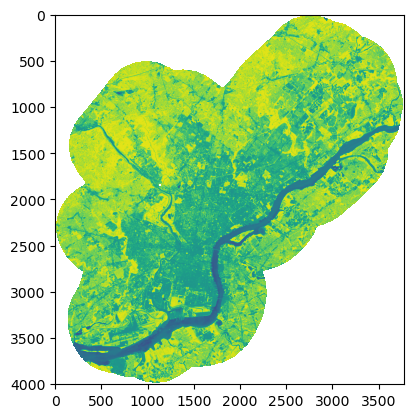

<AxesSubplot:>

In [11]:
# Calculate NDVI
# Planet recommends multiplying bands by coefficients made from TOA

# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Run Formula 
ndvi = (nir.astype(float) - red.astype(float)) / (nir + red)

# Explore
#ndvi # print
#np.nanmax(ndvi) # get max
show(source = ndvi, ax = None) # display

##### NDVI Test 2
Use BGU code - https://geobgu.xyz/py/rasterio.html#reading-raster-data

In [ ]:
# formula for sentinel 8 = NIR, 4 = red 

'''
ndvi = (r[8]-r[4]) / (r[8] + r[4])
ndvi
ndvi.nanmax(ndvi) # get max ignoring nan
show(ndvi) # display
'''

##### NDVI Test 3 
Uses Earthpy

In [ ]:
# Calculate NDVI w/ eartpy
# https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_calculate_classify_ndvi.html?highlight=difference#calculating-normalized-difference-in-python-using-earthpy
#naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])
#print(naip_ndvi)

#### Enhanced Vegetation Index (EVI)
Formula: 2.5 * (NIR - RED) / ((NIR + 6* RED - 7.5* BLUE) + 1

About: Considered the advanced ndvi, should be between 1 (green) and 0 (not healthy veg) (BUT landsat says it can be between -10k and 10k). Improved bc incorporate more bands that decrease background + atmospheric noise, + saturation. 


Sources: https://www.usgs.gov/landsat-missions/landsat-enhanced-vegetation-index;
https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/evi/#; https://hub4everybody.com/enhanced-vegetation-index-evi/?hs-panel=&hs-x=1883916.5156348734&hs-y=6303928.185111765&hs-z=11&hs-lang=en&hs-visible-layers=OpenStreetMap%3BEVI%202020_04_22%3BEVI%202020_05_22%3Brostenice_2020&map-swipe=disabled&app=default


EVI = G * ((NIR - R) / (NIR + C1 * R – C2 * B + L))
In Landsat 4-7, EVI = 2.5 * ((Band 4 – Band 3) / (Band 4 + 6 * Band 3 – 7.5 * Band 1 + 1)).

In [85]:
# Calculate EVI

# Run Formula 
evi = 2.5 * ((nir - red) / (nir + 6*red - 7.5*blue + 1))

# Explore
#np.nanmax(evi)
#np.min(evi)
#show(evi)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Normalized Difference Water Index (NDWI)
Formula: (Green-NIR)/(Green+NIR)

In [58]:
# Calculate NDWI

# Run Formula 
ndwi = (green - nir) / (green + nir)

# Explore
#np.nanmax(ndwi)
#show(ndwi)

#### Modified Normalized Difference Water Index (MNDWI)
Formula: MNDWI = (Green-MIR)/(Green+MIR)

In [ ]:
# Calculate MNDWI --> Is it possible without MIR?

# Run Formula 
#mndwi = (green - mir) / (green + mir)

# Explore
#np.nanmax(mndwi)
#show(mndwi)

#### Normalized Difference Moisture Index (NDMI)
Formula: NDMI = (NIR-SWIR1)/(NIR+SWIR1)

In [61]:
# Calculate NDMI

# Run Formula 
ndmi = (nir - swir1) / (nir + swir1)

# Explore
#np.nanmax(ndmi)
#show(ndmi)

#### Automated Water Extraction Index (AWEI)
Formulas: 
AWEInsh = 4(Green-SWIR1)-(.25NIR+2.75SWIR2) 
AWEIsh = blue + 2.5

Description: "AWEInsh is an index formulated to effectively eliminate nonwater pixels, including dark built surfaces in areas with urban background and AWEIsh is primarily formulated for further improvement of accuracy by removing shadow pixels that AWEInsh may not effectively eliminate. But in areas with highly reflective surfaces such as ice, snow and reflective roofs in urban areas, (aweish) may misclassify such surfaces as water."

Source: https://www.sciencedirect.com/science/article/pii/S0034425713002873?ref=pdf_download&fr=RR-2&rr=79e31ae5efb2b0c9

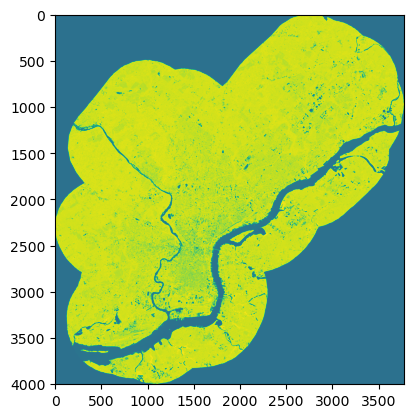

<AxesSubplot:>

In [80]:
# Calculate AWEI

# Run Formula 
awei = (4*(green - swir1))-(.25*nir + 2.75*swir2)

# Explore
#np.nanmax(awei)
#show(awei)

## Prepare DEM Data

In [ ]:
# Import DEM data

In [83]:
dem_path = ".\\Philadelphia_dem_3ft_2022\\Philadelphia_dem_3ft_2022.tif"
dem = rio.open(dem_path)
dem.crs # pennsylvania projection
#show(dem) # display

CRS.from_epsg(6565)

#### Calculate Slope
Source: https://www.earthdatascience.org/tutorials/get-slope-aspect-from-digital-elevation-model/

In [48]:
#import richdem as rd  
# error & need something from here - 
#https://visualstudio.microsoft.com/visual-cpp-build-tools/

In [ ]:
slope = rd.TerrainAttribute(shasta_dem, attrib='slope_riserun')
rd.rdShow(slope, axes=False, cmap='magma', figsize=(8, 5.5))

#### Calculate Shaded Relief (Hillshade)

# CLOSE EVERYTHING SO U DON'T GET HACKED

In [81]:
src.close()
s2.close()
dem.close()